<a href="https://colab.research.google.com/github/bidhan017/Time_Series/blob/main/TS_univariate_modeling_using_Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install prophet

In [41]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime
import pandas as pd
import plotly.express as px

mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False


Dataset consist of three features: demand, precipitation, and temperature for each hour.

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/nyc_energy_consumption.csv')

In [42]:
df['timeStamp']=pd.to_datetime(df['timeStamp'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49205 entries, 0 to 49204
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timeStamp  49205 non-null  datetime64[ns]
 1   demand     49124 non-null  float64       
 2   precip     48975 non-null  float64       
 3   temp       49019 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 1.5 MB


In [ ]:
df.head()

,timeStamp,demand,precip,temp
0,2012-01-01 00:00:00,4937.5,0.0,46.13
1,2012-01-01 01:00:00,4752.1,0.0,45.89
2,2012-01-01 02:00:00,4542.6,0.0,45.04
3,2012-01-01 03:00:00,4357.7,0.0,45.03
4,2012-01-01 04:00:00,4275.5,0.0,42.61


In [ ]:
fig = px.line(df, x='timeStamp', y='demand', title='NYC Energy Demand')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="3y", step="year", stepmode="backward"),
            dict(count=3, label="5y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  v = v.dt.to_pydatetime()


In [ ]:
ny_df=df.set_index('timeStamp')

array([<Axes: xlabel='timeStamp'>, <Axes: xlabel='timeStamp'>,
       <Axes: xlabel='timeStamp'>], dtype=object)

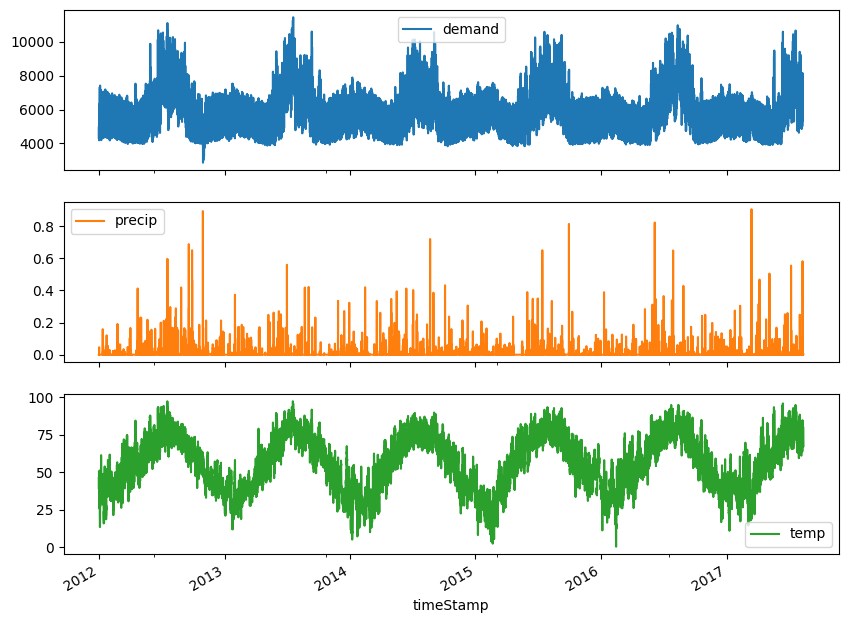

In [ ]:
ny_df.plot(subplots=True)

Resample the data from hour to daily level.

In [ ]:
ny_df.resample('D').mean()

,demand,precip,temp
timeStamp,,,
2012-01-01,4954.833333,0.002487,46.510000
2012-01-02,5302.954167,0.000000,40.496667
2012-01-03,6095.512500,0.000000,26.672500
2012-01-04,6336.266667,0.000000,20.585000
2012-01-05,6130.245833,0.000000,33.577500
...,...,...,...
2017-08-08,6471.626042,0.000000,71.039167
2017-08-09,6811.112167,0.047529,73.852500
2017-08-10,5582.297000,0.002033,75.217500


array([<Axes: xlabel='timeStamp'>, <Axes: xlabel='timeStamp'>,
       <Axes: xlabel='timeStamp'>], dtype=object)

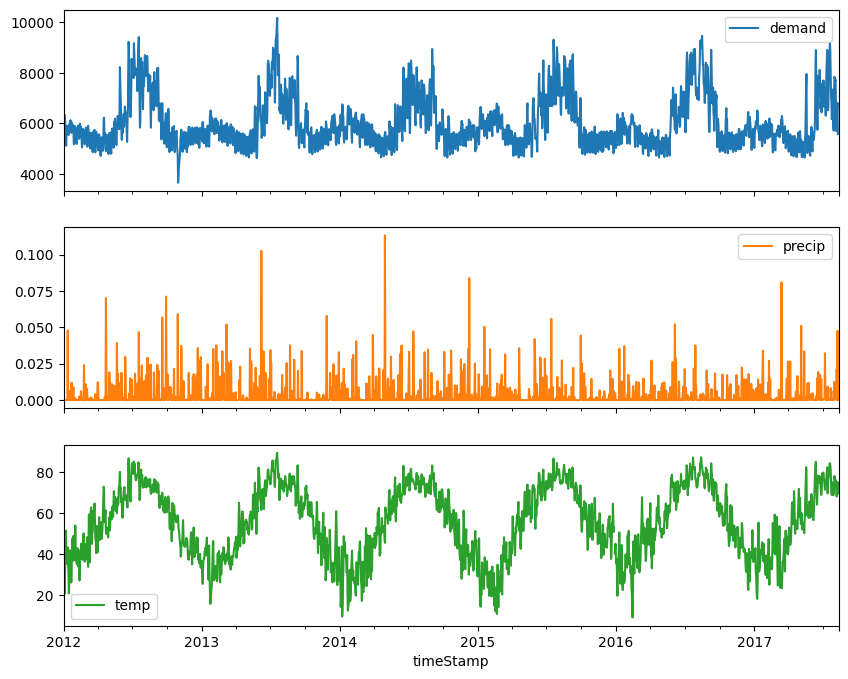

In [ ]:
ny_df.resample('D').mean().plot(subplots=True)

In [ ]:
ny_df_daily=ny_df.resample('D').mean()

Prophet Paper - https://peerj.com/preprints/3190/

y(t)= g(t) + s(t) + h(t) + εt

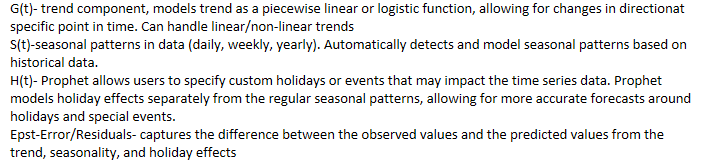


In [ ]:
from prophet import Prophet

renaming the columns. prophet expects the column to be with this name.

In [ ]:
ny_df_final=ny_df_daily.reset_index()[['timeStamp','demand']].rename({'timeStamp':'ds','demand':'y'}, axis='columns')

Unlike ARIMA, prophet takes care of null value. However, its good to impute based on our business understanding.

In [ ]:
ny_df_final

,ds,y
0,2012-01-01,4954.833333
1,2012-01-02,5302.954167
2,2012-01-03,6095.512500
3,2012-01-04,6336.266667
4,2012-01-05,6130.245833
...,...,...
2046,2017-08-08,6471.626042
2047,2017-08-09,6811.112167
2048,2017-08-10,5582.297000
2049,2017-08-11,NaN


In [ ]:
train=ny_df_final[(ny_df_final['ds'] >= '2012-01-01') & (ny_df_final['ds'] <= '2017-04-30')]
test=ny_df_final[(ny_df_final['ds'] > '2017-04-30')]

In [ ]:
train.shape

(1947, 2)

In [ ]:
test.shape

(104, 2)

In [ ]:
m = Prophet(interval_width=0.95,yearly_seasonality=True)

In [ ]:
m.fit(train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdxm49x6x/bj7m6719.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdxm49x6x/30ceziwl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53653', 'data', 'file=/tmp/tmpdxm49x6x/bj7m6719.json', 'init=/tmp/tmpdxm49x6x/30ceziwl.json', 'output', 'file=/tmp/tmpdxm49x6x/prophet_modelgtu6_p7f/prophet_model-20240822100410.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:04:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:04:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
m.params

OrderedDict([('lp__', array([[5009.88]])),
             ('k', array([[0.0885303]])),
             ('m', array([[0.593289]])),
             ('delta',
              array([[-8.51377e-08, -4.46024e-04, -1.00778e-01, -9.10087e-08,
                       2.08754e-08,  2.84313e-07,  1.81086e-08, -1.02157e-07,
                      -2.72908e-08, -3.77655e-08, -2.69110e-02, -7.17684e-02,
                      -2.08567e-07, -4.81343e-08,  2.30977e-01,  2.12849e-06,
                      -3.80712e-07, -8.58136e-02, -4.35610e-02,  2.02909e-08,
                       2.46565e-08,  2.03889e-08,  2.76521e-03,  1.22544e-02,
                       5.24778e-08]])),
             ('sigma_obs', array([[0.0459738]])),
             ('beta',
              array([[-0.0345704 , -0.0705133 ,  0.0576085 ,  0.0470652 , -0.014056  ,
                      -0.00500044, -0.00386426, -0.0007405 ,  0.00242043, -0.00755564,
                       0.00405483,  0.00483132, -0.00789636, -0.00470438,  0.00701818,
          

In [ ]:
future = m.make_future_dataframe(periods=104)
future.tail()

,ds
2046,2017-08-08
2047,2017-08-09
2048,2017-08-10
2049,2017-08-11
2050,2017-08-12


'yhat_lower', 'yhat_upper' are lower and upper bound at 95% CI

In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2046,2017-08-08,7590.895873,6574.530461,8429.898225
2047,2017-08-09,7580.018324,6616.622011,8525.742326
2048,2017-08-10,7534.743337,6657.084856,8422.541559
2049,2017-08-11,7489.968485,6547.655567,8389.486483
2050,2017-08-12,6915.155942,6025.950352,7818.004416


plotting using pandas concat function

<Axes: xlabel='ds'>

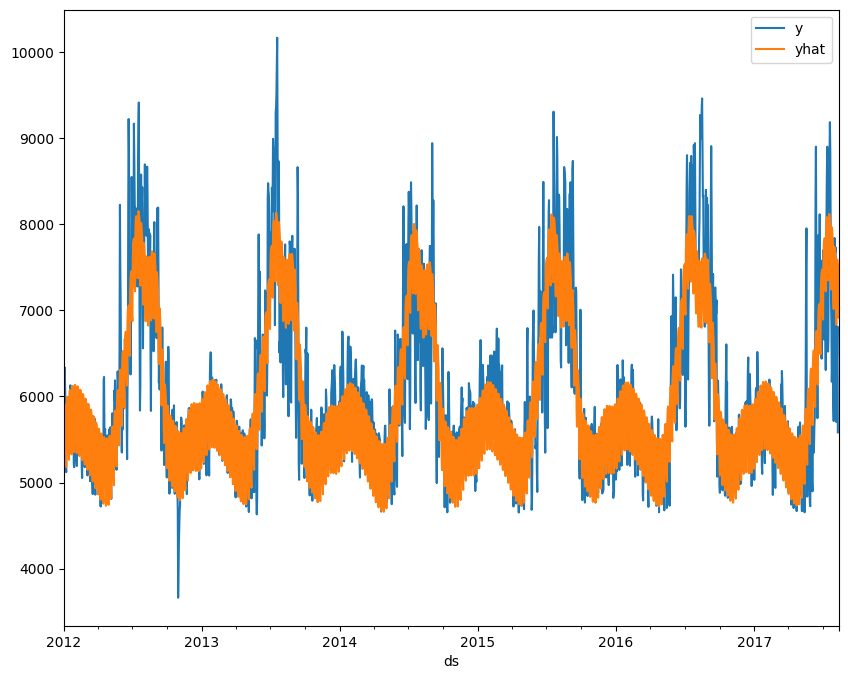

In [ ]:
pd.concat([ny_df_final.set_index('ds')['y'],forecast.set_index('ds')['yhat']],axis=1).plot()

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



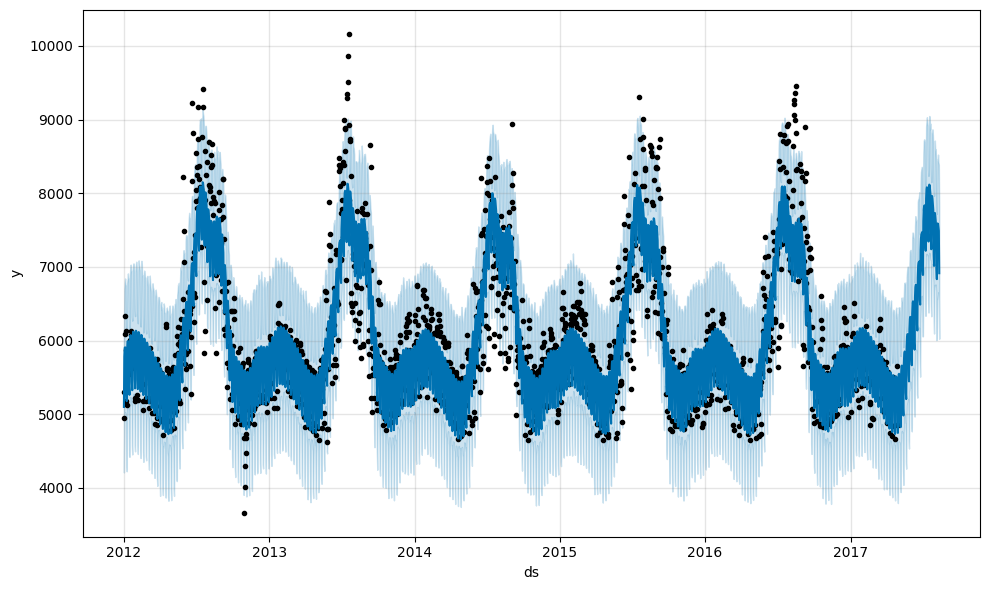

In [ ]:
fig1 = m.plot(forecast)

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:228: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:351: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:354: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



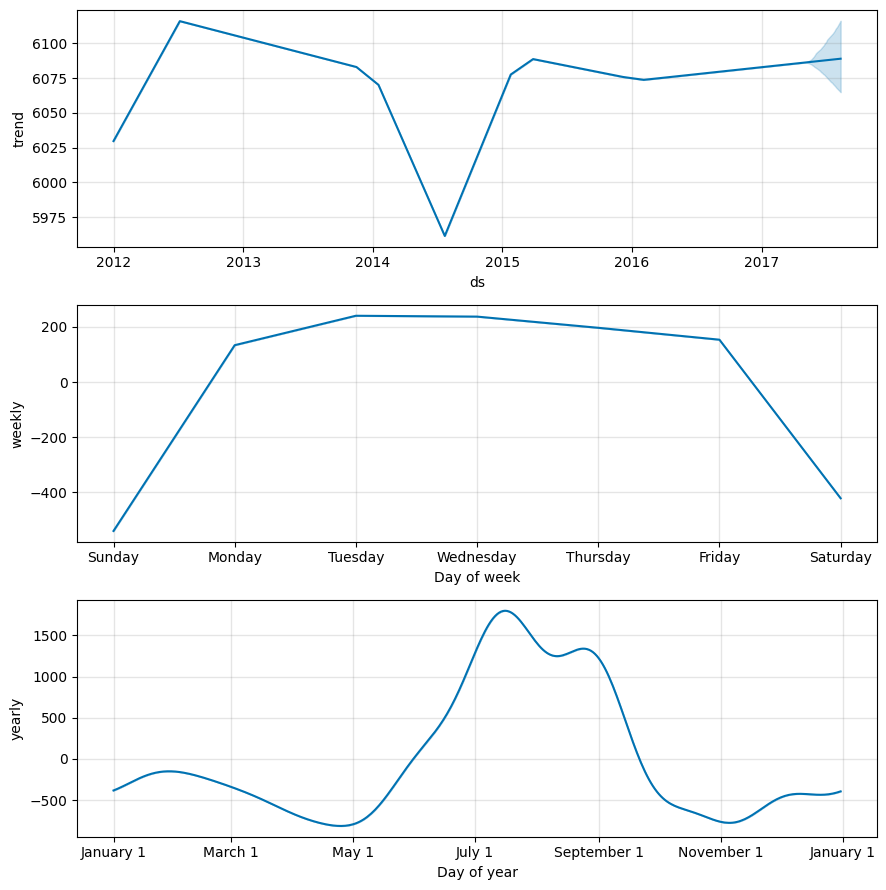

In [ ]:
fig2 = m.plot_components(forecast)

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



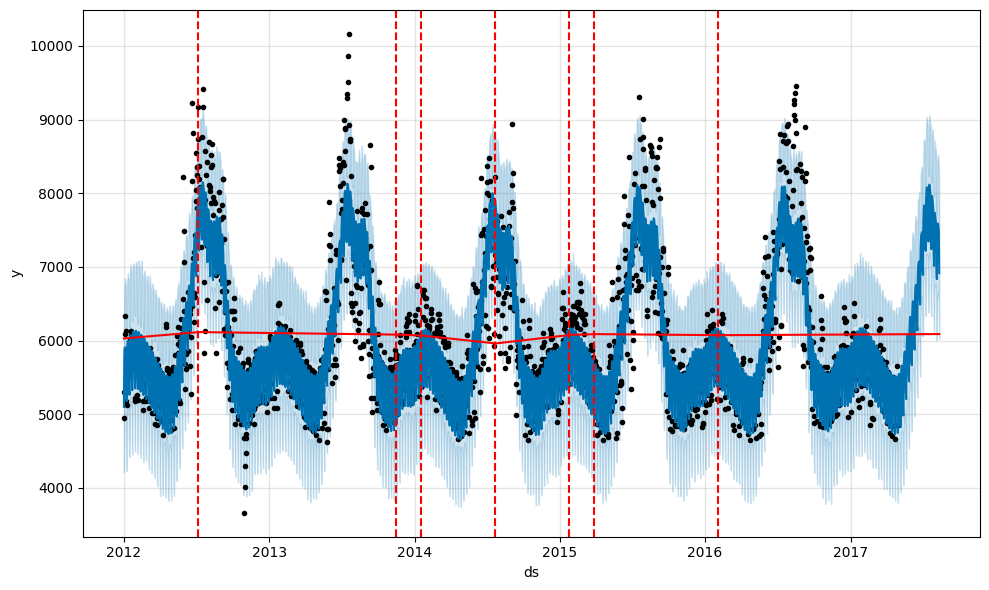

In [ ]:
from prophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

In [ ]:
deltas = m.params['delta'].mean(0)
deltas

array([-8.51377e-08, -4.46024e-04, -1.00778e-01, -9.10087e-08,
        2.08754e-08,  2.84313e-07,  1.81086e-08, -1.02157e-07,
       -2.72908e-08, -3.77655e-08, -2.69110e-02, -7.17684e-02,
       -2.08567e-07, -4.81343e-08,  2.30977e-01,  2.12849e-06,
       -3.80712e-07, -8.58136e-02, -4.35610e-02,  2.02909e-08,
        2.46565e-08,  2.03889e-08,  2.76521e-03,  1.22544e-02,
        5.24778e-08])

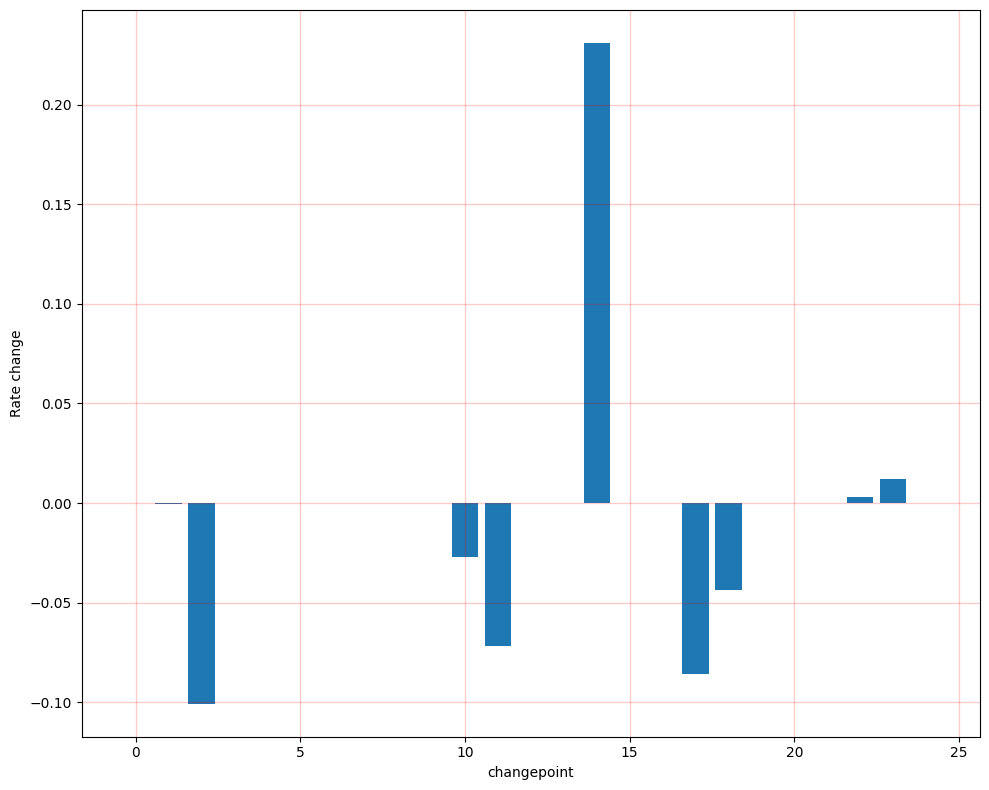

In [ ]:
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111)
ax.bar(range(len(deltas)), deltas)
ax.grid(True, which='major', c='red', ls='-', lw=1, alpha=0.2)
ax.set_ylabel('Rate change')
ax.set_xlabel('changepoint')
fig.tight_layout()

In [ ]:
m.changepoints

,ds
62,2012-03-03
124,2012-05-04
187,2012-07-06
249,2012-09-06
311,2012-11-07
373,2013-01-08
436,2013-03-12
498,2013-05-13
560,2013-07-14
622,2013-09-14


change point= 90%

In [ ]:
pro_change= Prophet(changepoint_range = 0.9, yearly_seasonality=True)
forecast = pro_change.fit(train).predict(future)
fig= pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)

In [ ]:
from prophet.plot import plot_plotly
import plotly.offline as py

fig = plot_plotly(m, forecast)  # This returns a plotly Figure
py.iplot(fig)

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [ ]:
from prophet.diagnostics import cross_validation
cv_results = cross_validation( model = m, initial = '731 days', horizon = '365 days')

INFO:prophet:Making 5 forecasts with cutoffs between 2014-05-01 00:00:00 and 2016-04-30 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpdxm49x6x/r9yiahcw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdxm49x6x/azzpw9g1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84417', 'data', 'file=/tmp/tmpdxm49x6x/r9yiahcw.json', 'init=/tmp/tmpdxm49x6x/azzpw9g1.json', 'output', 'file=/tmp/tmpdxm49x6x/prophet_model5pe13gsu/prophet_model-20240822100531.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:05:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:05:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdxm49x6x/03o3fpqg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdxm49x6x/oddcl0su.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

In [ ]:
cv_results.head()


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2014-05-02,5562.385568,4722.619260,6354.419743,5460.325000,2014-05-01
1,2014-05-03,4972.424834,4144.705352,5809.177793,4893.683333,2014-05-01
2,2014-05-04,4848.628078,4031.218644,5735.799467,4764.137500,2014-05-01
3,2014-05-05,5529.560178,4696.028696,6405.818666,5406.762500,2014-05-01
4,2014-05-06,5624.514712,4674.908697,6499.870897,5409.750000,2014-05-01


In [ ]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(cv_results)
df_p

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,36 days 12:00:00,252053.608552,502.049408,406.744161,0.073115,0.065578,0.072144,0.884615
1,37 days 00:00:00,258748.469515,508.673244,414.105603,0.074395,0.066026,0.073340,0.879121
2,37 days 12:00:00,261071.043027,510.951116,417.504630,0.074981,0.067249,0.073955,0.879121
3,38 days 00:00:00,263836.859290,513.650523,420.595342,0.075243,0.068184,0.074191,0.879121
4,38 days 12:00:00,267546.528919,517.249001,425.838499,0.076081,0.068469,0.075056,0.879121
...,...,...,...,...,...,...,...,...
653,363 days 00:00:00,260441.866698,510.335053,447.558736,0.082610,0.082046,0.081706,0.983516
654,363 days 12:00:00,262153.389531,512.009169,448.641450,0.082802,0.082835,0.081994,0.983516
655,364 days 00:00:00,266545.846578,516.280783,452.233982,0.083649,0.084443,0.082846,0.978022
656,364 days 12:00:00,266605.804600,516.338847,451.944646,0.083633,0.084443,0.082915,0.978022
